In [4]:
import pandas as pd 
import numpy as np 
import os

In [52]:
data_path = 'C:/Users/User/Documents/TradeStation 10.0/Data'
wd = 'd:\\Tensor Investment Management Fund\\Tensor_Project\\'

In [5]:
os.listdir(data_path)

['2020-09-14 MICRO_MINI_DOW_JONES_FUTURE.txt',
 '2020-09-14 MICRO_MINI_NASDAQ_FUTURE.txt',
 '2020-09-14 MICRO_MINI_RUSSEL_FUTURE.txt',
 '2020-09-14 MICRO_MINI_S&P_FUTURE.txt',
 'NASDAQ_Index_01-02-1997_07-18-2020.txt',
 'PHLX Gold-Silver_Index.txt',
 'S&P_500_ETF.txt',
 'S&P_Index_01-02-1991_18-07-2020_1_min.txt',
 'VIX_historical.txt']

In [77]:
files = [f for f in os.listdir(data_path) if "FUTURE" in f]

In [78]:
files

['2020-09-14 MICRO_MINI_DOW_JONES_FUTURE.txt',
 '2020-09-14 MICRO_MINI_NASDAQ_FUTURE.txt',
 '2020-09-14 MICRO_MINI_RUSSEL_FUTURE.txt',
 '2020-09-14 MICRO_MINI_S&P_FUTURE.txt']

In [70]:
#Create some temporal features 
def create_temporal_features(df):

    df.loc[:,'Date'] = pd.to_datetime(df['Date'], format = "%m/%d/%Y", errors = 'coerce') 

    df['year'] = df['Date'].dt.year
    df['month'] = df['Date'].dt.month
    df['day'] = df['Date'].dt.day
    df['hour'] = df['Time'].str[:2]
    df['minute'] = df['Time'].str[-2:]

    return df

In [79]:
# Save new files to parquet
text_files_to_parquet = False

if text_files_to_parquet:

    for file_name in files:

        df = pd.read_csv(os.path.join(data_path,file_name), sep = ',')
        df = create_temporal_features(df_nasdaq).copy()
        df.to_parquet(os.path.join(wd,'data', file_name.replace('.txt', '.parquet')))

In [84]:
# Available Data 
os.listdir(os.path.join(wd, 'data'))

['2020-09-14 MICRO_MINI_DOW_JONES_FUTURE.parquet',
 '2020-09-14 MICRO_MINI_NASDAQ_FUTURE.parquet',
 '2020-09-14 MICRO_MINI_RUSSEL_FUTURE.parquet',
 '2020-09-14 MICRO_MINI_S&P_FUTURE.parquet']

In [56]:
# Read in data 
df_nasdaq = pd.read_parquet()

In [88]:
df_nasdaq_2020  = df_nasdaq[df_nasdaq.Date >= '2020-01-01']

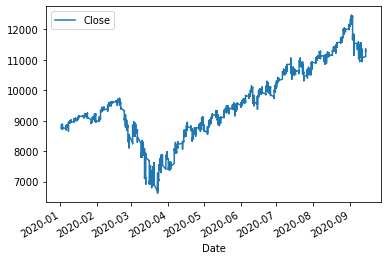

In [90]:
df_nasdaq_2020.plot(x='Date',y='Close')

In [101]:
df_nasdaq_2020.dtypes

Date      datetime64[ns]
Time              object
Open             float64
High             float64
Low              float64
Close            float64
Vol                int64
OI                 int64
year               int64
month              int64
day                int64
hour              object
minute            object
dtype: object

In [153]:
test = df_nasdaq_2020[ (df_nasdaq_2020['month'] == 1) & (df_nasdaq_2020['day'] == 3) & (df_nasdaq_2020['hour'] == '15')]

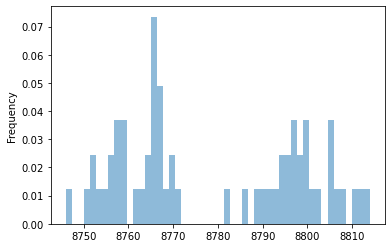

In [154]:
test['Close'].plot(kind='hist', bins=50, density=True, alpha=0.5)

In [155]:
test.head()

,Date,Time,Open,High,Low,Close,Vol,OI,year,month,day,hour,minute
5478426,2020-01-03,15:00,8765.25,8766.75,8764.75,8765.50,122,97,2020,1,3,15,00
5478427,2020-01-03,15:01,8765.50,8767.00,8764.75,8766.25,90,114,2020,1,3,15,01
5478428,2020-01-03,15:02,8766.50,8767.00,8765.50,8766.50,126,121,2020,1,3,15,02
5478429,2020-01-03,15:03,8766.50,8771.75,8766.25,8771.50,278,167,2020,1,3,15,03
5478430,2020-01-03,15:04,8771.75,8772.50,8769.00,8769.50,96,141,2020,1,3,15,04
